<a href="https://colab.research.google.com/github/soyudea/Proyecto_IA_2023/blob/main/Proyecto_Entrega_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Librerías usadas en el Proyectos**

In [2]:
import pandas as pd
import numpy as np
import math
from seaborn import distplot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score, mean_squared_error
from matplotlib.patches import split_path_inout
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot

from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

from sklearn.decomposition import PCA

**Carga del dataset **
https://www.kaggle.com/competitions/playground-series-s3e2/data?select=train.csv

In [3]:
#Se carga dataset obtenido de Kaggle de competencia
#==============================================================
datos = pd.read_csv('train.csv', sep=",")
datos_test = pd.read_csv('test.csv', sep=",")
df =datos.copy()
df_test=datos_test.copy()

**Se agregan valores nulos al 5 % de las muestras en los campos age, avg_glucose_level**

In [4]:
#Se adiciona valores nulos al atributo age y avg_glucose_level
#=============================================================
#df =datos.copy()
lista=[]
porc_nulos =int(np.shape(df)[0]*5/100)   #Calculo de porcentaje de datos nulos
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "age"] = np.nan

lista=[]
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "avg_glucose_level"] = np.nan

**Estado del dataset despues de agregar valores nulos**

In [5]:
df.isna().sum().sort_values()

id                     0
gender                 0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
bmi                    0
smoking_status         0
stroke                 0
avg_glucose_level    739
age                  750
dtype: int64

**Se agregan valores promedios en aquellas muestras con valores nulos**

In [6]:
#Se agregan valores promedios al atributo age cuando son nulos
#==================================================================

mean_age = df['age'].mean().astype(int) #Calculo media de las edades

for i in range(len(df)):
    if math. isnan(df.at[i, "age"]):
       df.at[i, "age"] = mean_age

In [7]:
#Se agrega valores promedios al atributo avg_glucose_level cuando son nulos
#===============================================================================================
mean_avg_glucose_level = df['avg_glucose_level'].mean().astype(int) #Calculo media de las edades

for i in range(len(df)):
    if math. isnan(df.at[i, "avg_glucose_level"]):
       df.at[i, "avg_glucose_level"] = mean_avg_glucose_level

**Estado final del dataset despues de reemplazar valores nulos con valores promedios**

In [8]:
datos['age'] = datos['age'].astype('int64') 
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  int64  
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.4+ MB


**Estado del dataSet**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [13]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**Discretización de las variables 'age', 'avge_glucose_level', 'bmi'**

In [9]:
#Se transforma campo numerico age a un atributo con valores categoricos, se discretisa
#========================================================================================================================================================

df = datos.copy()

edades = pd.cut(df['age'], bins = [0,10,20,40,np.inf], labels =['niño','joven','adulto','mayor'], include_lowest=True, retbins = True)
df['new_age'] = list(edades[0]) 

glucosa = pd.cut(df['avg_glucose_level'], bins = [0,100,125,np.inf], labels = ['normal', 'prediabetico','diabetico'], include_lowest=True, retbins=True)
df["avg_glucose"] = list(glucosa[0])

im = pd.cut(df['bmi'], bins = [18.5,24.9,25,29.9,np.inf], labels = ['low_weight', 'Healthy_weight','overweight','obesity'], include_lowest=True, retbins=True)
df['bmi_range'] = list(im[0])
df.shape

(15304, 15)

**Transformación del dataset, de variables categoricas a númericas**

In [10]:
#Se obtiene un dataset con todos sus atributos numéricos
#========================================================================================================================================================================================================================================
#Quitar la variable work_type

vnumericas = df.drop(["id","avg_glucose_level","age","bmi","new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"],axis=1)#SE crea variable númerica sin las categoricas 
vcategoricas=df.filter(["new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"]) 

#vnumericas = df.drop(["id","avg_glucose_level","age","bmi","new_age","avg_glucose","bmi_range","gender","ever_married","work_type","Residence_type","smoking_status", "bmi_range"],axis=1)#SE crea variable númerica sin las categoricas 
#vcategoricas=df.filter(["new_age","avg_glucose","bmi_range","gender","ever_married","smoking_status"]) 

cat_numerica=pd.get_dummies(vcategoricas,drop_first=False) 
df=pd.concat([cat_numerica,vnumericas],axis=1)
#datos = df
df.shape

(15304, 34)

**Organización del dataset final**

In [11]:
X = df[:len(df)]
y = df['stroke']
X = X.drop(columns=['stroke'])
X.columns
X.shape

(15304, 33)

**Generador de muestras sintéticas**

In [12]:
pca=PCA(n_components=30) 
pca.fit(X) #
X_pca=pca.transform(X)

In [13]:
#sampling_strategyfloat, str, dict or callable, default=’auto’

ros = RandomOverSampler(random_state=42, sampling_strategy=1.0)                          
Xres, yres = ros.fit_resample(X_pca, y)
Xtrain, Xtst, ytrain, ytst = train_test_split(Xres,yres, test_size=0.1) #Se toma el 90 % de los datos para Entrenar
print (Xtrain.shape, ytrain.shape, Xtst.shape, ytst.shape)
X=Xtrain
y=ytrain

(26409, 30) (26409,) (2935, 30) (2935,)


**Calculo pesos de la clase Parametro que se usa para minimizar el efecto del desbalance del dataset**

In [14]:
def dar_peso_clase():
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, train_size = 0.8, random_state = 17)
  Number_Muestras_por_Clase = ytrain.value_counts()
  Number_Muestras_por_Clase = Number_Muestras_por_Clase.sort_index(axis = 0, ascending = True)
  Numero_de_Clases = len(Number_Muestras_por_Clase.index)
  Peso_por_Clase = len(ytrain)/(Numero_de_Clases*Number_Muestras_por_Clase)
  return Peso_por_Clase

**Modelo DecisionTreeClassifie**r https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
#Entrenamiento del modelo  DecisionTreeClassifier con el 90% de las muestras
#=================================================================================================================
from sklearn.linear_model import LassoCV
from sklearn.metrics import roc_auc_score
kf = KFold(n_splits=20, random_state = True,shuffle=True)

preds = []
scores = []

model_params = {
    'precompute': 'auto',
    'fit_intercept': True,
    'max_iter': 100000,
    'verbose': False,
    'eps': 1e-04, 
    'n_alphas': 1000,
    'n_jobs': -1,
}
weight= dar_peso_clase()

classifier = DecisionTreeClassifier(criterion='gini',
                                    ccp_alpha=0.000001,
                                    min_samples_split=10,
                                    class_weight= {0: weight[0], 1: weight[1]},
                                    random_state=42)  #Falta parametrizar
X_test =0
y_test =0
for train_index, test_index in kf.split(X):

    #X_train, X_test = X_pca.iloc[train_index], X.iloc[test_index] #Linea de código cuando no usamos PCA
    X_train, X_test = X[train_index], X[test_index]  #linea de código para pca
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #modelo = LassoCV(**model_params)
    modelo = classifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    print()
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =4, labels=[0,1]))
    preds.append(modelo.predict(X_test))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    scores.append(s)
    print()


[[494 178]
 [ 69 580]]
              precision    recall  f1-score   support

           0     0.8774    0.7351    0.8000       672
           1     0.7652    0.8937    0.8244       649

    accuracy                         0.8130      1321
   macro avg     0.8213    0.8144    0.8122      1321
weighted avg     0.8223    0.8130    0.8120      1321

Best val auc:  0.8144


[[455 150]
 [ 90 626]]
              precision    recall  f1-score   support

           0     0.8349    0.7521    0.7913       605
           1     0.8067    0.8743    0.8391       716

    accuracy                         0.8183      1321
   macro avg     0.8208    0.8132    0.8152      1321
weighted avg     0.8196    0.8183    0.8172      1321

Best val auc:  0.8132


[[471 183]
 [ 77 590]]
              precision    recall  f1-score   support

           0     0.8595    0.7202    0.7837       654
           1     0.7633    0.8846    0.8194       667

    accuracy                         0.8032      1321
   macro a

**Curva ROC para el  DecisionTreeClassifier**

Sin entrenar: ROC AUC=0.500
Algoritmo arbol de: ROC AUC=0.810



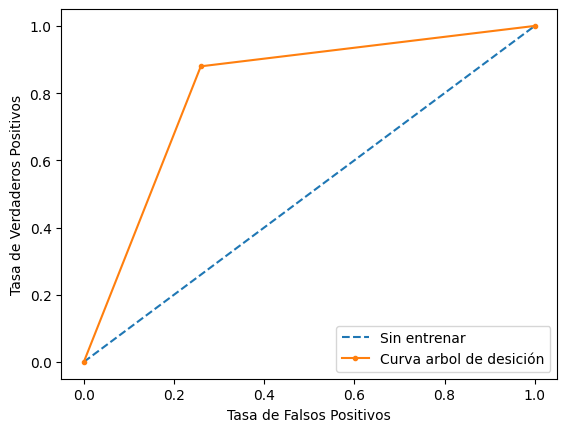

In [27]:
#Curva ROC Arbol de desición

classes = classifier.predict(X_test) 
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs,average='weighted')
classifier_auc = roc_auc_score(y_test,classes,average='weighted')

#aps = average_precision_score(y_test, ns_probs)
#print("Average_presicion_score "+str(aps))

print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo arbol de: ROC AUC=%.3f' % (classifier_auc))
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr, classifier_tpr, _ = roc_curve(y_test, classifier_probs)
print()
pyplot.plot(classifier_fpr, classifier_tpr, marker='.', label='Curva arbol de desición')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

**Maquina de soporte vectorial** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
from sklearn.utils.fixes import loguniform
param_grid = {'kernel': ['rbf'], 'C':[1, 10, 20],
              'gamma': [1e-3, 1e-4] ,
              
              } 
#'tol':[1e-3, 1e-4],           
#  'decision_function_shape':['ovo', 'ovr']

svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, param_grid, cv=5,n_jobs=2)
clf.fit(X, y) 
parametros = pd.concat([pd.DataFrame(clf.cv_results_["params"]),
                pd.DataFrame(clf.cv_results_["mean_test_score"],
                columns=["Accuracy"])],axis=1)
print(parametros)

    C   gamma kernel  Accuracy
0   1  0.0010    rbf  0.729372
1   1  0.0001    rbf  0.722746
2  10  0.0010    rbf  0.729372
3  10  0.0001    rbf  0.729372
4  20  0.0010    rbf  0.729372
5  20  0.0001    rbf  0.729372


In [22]:
kf = KFold(n_splits=5, random_state = True,shuffle=True)
c=10
weight= dar_peso_clase()
X_test =0
y_test =0
svclassifier = SVC(C=c,kernel="rbf", gamma=0.0010,shrinking=False,tol=0.0010,
                   class_weight = {0: weight[0], 1: weight[1]},
                   decision_function_shape='ovo')
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    modelo = svclassifier.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print()
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits =6, labels=[0,1],zero_division=1))
    s = roc_auc_score(y_test, modelo.predict(X_test))
    print(f'Best val auc: {s: .4f}')
    print()


[[1233 1432]
 [  48 2569]]
              precision    recall  f1-score   support

           0   0.962529  0.462664  0.624937      2665
           1   0.642089  0.981658  0.776367      2617

    accuracy                       0.719803      5282
   macro avg   0.802309  0.722161  0.700652      5282
weighted avg   0.803765  0.719803  0.699964      5282

Best val auc:  0.7222


[[1291 1395]
 [  52 2544]]
              precision    recall  f1-score   support

           0   0.961281  0.480640  0.640854      2686
           1   0.645849  0.979969  0.778577      2596

    accuracy                       0.726051      5282
   macro avg   0.803565  0.730305  0.709715      5282
weighted avg   0.806252  0.726051  0.708542      5282

Best val auc:  0.7303


[[1283 1377]
 [  52 2570]]
              precision    recall  f1-score   support

           0   0.961049  0.482331  0.642303      2660
           1   0.651127  0.980168  0.782463      2622

    accuracy                       0.729459      528

**Curva ROC Modelo maquina de soporte Vectorial SVC**

Average_presicion_score 0.5106987313008899
Sin entrenar: ROC AUC=0.500
Algoritmo SVC: ROC AUC=0.728



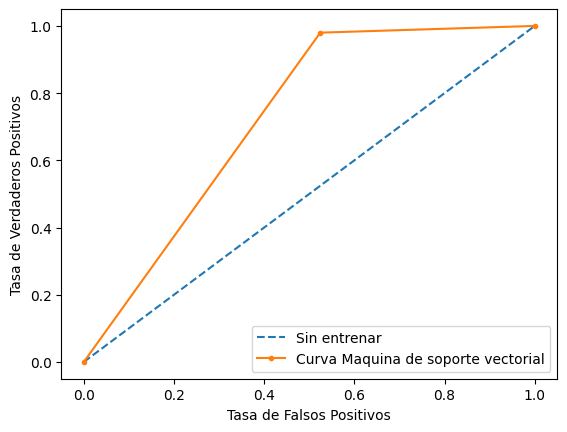

In [23]:
#Curva ROC

classes = svclassifier.predict(X_test)
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs,average='weighted')
svclassifier_auc = roc_auc_score(y_test,classes,average='weighted')
aps = average_precision_score(y_test, ns_probs)

print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo SVC: ROC AUC=%.3f' % (svclassifier_auc))
svclassifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
svclassifier_fpr, classifier_tpr, _ = roc_curve(y_test, svclassifier_probs)
print()
pyplot.plot(svclassifier_fpr, classifier_tpr, marker='.', label='Curva Maquina de soporte vectorial')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()
print()

**Modelo de clasificación random Forest Entrenamiento con el 90 % de los datos**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [15]:
#X = df[:len(df)]
#y = df['stroke']
#X = X.drop(columns=['stroke'])

weight = dar_peso_clase() 

kf = KFokf = KFold(n_splits=50, random_state = True,shuffle=True)

#class_weight = {0: Peso_por_Clase[0], 1: Peso_por_Clase[1]
#max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
#  random_state=True,
#min_weight_fraction_leaf=0.00005,
#n_estimators=5,
#min_impurity_decrease=0.005,
# ccp_alpha=0.000001,
# max_features ="sqrt",
#  warm_start=True,
#  n_jobs=2,
X_test =0
Y_test =0
classifier = RandomForestClassifier(min_samples_split=10,
                                    ccp_alpha=0.000001,
                                    criterion='gini',
                                    class_weight = {0: weight[0], 1: weight[1]},
                                    random_state=True)

for train_index, test_index in kf.split(X):
    
    #Xtrain, Xtest = X.iloc[train_index], X.iloc[test_index]
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]
    modelo = classifier.fit(Xtrain, ytrain)
    ypred = modelo.predict(Xtest)

    print()
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred, digits =4, labels=[0,1]))
    s = roc_auc_score(ytest, modelo.predict(Xtest))
    print(f'Best val auc: {s: .4f}')


[[185  77]
 [ 20 247]]
              precision    recall  f1-score   support

           0     0.9024    0.7061    0.7923       262
           1     0.7623    0.9251    0.8359       267

    accuracy                         0.8166       529
   macro avg     0.8324    0.8156    0.8141       529
weighted avg     0.8317    0.8166    0.8143       529

Best val auc:  0.8156

[[196  76]
 [ 19 238]]
              precision    recall  f1-score   support

           0     0.9116    0.7206    0.8049       272
           1     0.7580    0.9261    0.8336       257

    accuracy                         0.8204       529
   macro avg     0.8348    0.8233    0.8193       529
weighted avg     0.8370    0.8204    0.8189       529

Best val auc:  0.8233

[[174  79]
 [ 29 247]]
              precision    recall  f1-score   support

           0     0.8571    0.6877    0.7632       253
           1     0.7577    0.8949    0.8206       276

    accuracy                         0.7958       529
   macro avg

**Curva ROC, RandomForest**


Sin entrenar: ROC AUC=0.500
Algoritmo RandomForest: ROC AUC=0.795




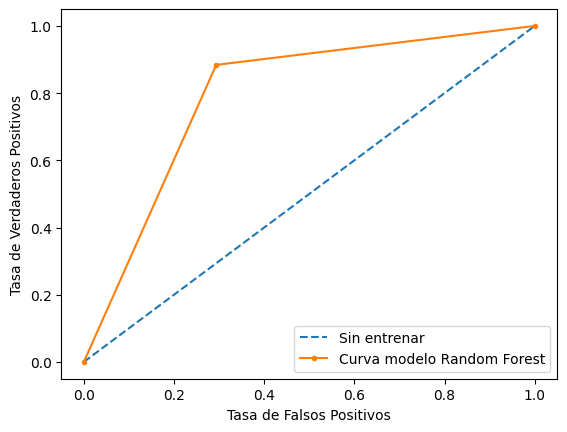

In [16]:
classes = classifier.predict(Xtest)
ns_probs = [0 for _ in range(len(ytest))]
ns_auc = roc_auc_score(ytest, ns_probs,average='weighted')
classifier_auc = roc_auc_score(ytest,classes,average='weighted')
#aps = average_precision_score(ytest, ns_probs)
print()
#print("Average_presicion_score "+str(aps))
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Algoritmo RandomForest: ROC AUC=%.3f' % (classifier_auc))
print()
classifier_probs = classes[:]
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
classifier_fpr,classifier_tpr, _ = roc_curve(ytest, classifier_probs)
print()
pyplot.plot(classifier_fpr,classifier_tpr, marker='.', label='Curva modelo Random Forest')
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()